In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# *DEFINING STOCK PORTFOLIO*

In [13]:
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS',
           'ITC.NS', 'LT.NS', 'SBIN.NS', 'HINDUNILVR.NS', 'ASIANPAINT.NS']

weights = []

print("Enter portfolio weights for each stock as a percentage (e.g., 10 for 10%)")

for ticker in tickers:
    while True:
        try:
            w = float(input(f"{ticker}: "))
            if w < 0 or w > 100:
                print("Please enter a value between 0 and 100.")
                continue
            weights.append(w / 100)  # Convert to decimal
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

total_weight = sum(weights)
if abs(total_weight - 1.0) > 1e-6:
    print(f"\n❌ The total weights add up to {total_weight*100:.2f}%. Please ensure they sum to 100%.")
    exit()

print("\n✅ Weights accepted:")
for i in range(len(tickers)):
    print(f"{tickers[i]}: {weights[i]*100:.2f}%")


Enter portfolio weights for each stock as a percentage (e.g., 10 for 10%)


RELIANCE.NS:  10
TCS.NS:  10
INFY.NS:  10
HDFCBANK.NS:  10
ICICIBANK.NS:  10
ITC.NS:  10
LT.NS:  10
SBIN.NS:  10
HINDUNILVR.NS:  5
ASIANPAINT.NS:  15



✅ Weights accepted:
RELIANCE.NS: 10.00%
TCS.NS: 10.00%
INFY.NS: 10.00%
HDFCBANK.NS: 10.00%
ICICIBANK.NS: 10.00%
ITC.NS: 10.00%
LT.NS: 10.00%
SBIN.NS: 10.00%
HINDUNILVR.NS: 5.00%
ASIANPAINT.NS: 15.00%


# *INPUT INVESTMENT AMOUNT*

In [15]:
def get_investment_amount():
    while True:
        try:
            amount = float(input("Enter your investment amount (in ₹): "))
            if amount <= 0:
                print("Amount must be positive.")
                continue
            return amount
        except ValueError:
            print("Invalid input. Please enter a number.")

investment_amount = get_investment_amount()


Enter your investment amount (in ₹):  300000


# *DOWNLOAD STOCK DATA*

In [19]:
start_date = '2015-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)


[*********************100%***********************]  10 of 10 completed


# *CALCULATING NUMBER OF SHARES*

In [27]:
shares = {}
initial_day = data.index.min()

for i, ticker in enumerate(tickers):
    price = data[ticker].loc[initial_day]['Close']
    shares[ticker] = (investment_amount * weights[i]) / price


# *CALCULATE PORTFOLIO VALUE OVER TIME*

In [37]:
portfolio_values = pd.DataFrame(index=data.index)

for ticker in tickers:
    portfolio_values[ticker] = data[ticker]['Close'] * shares[ticker]
portfolio_values['Total Value'] = portfolio_values.sum(axis=1)


# *CALCULATE PURCHASE SUMMARY*

In [39]:
print("\n📊 Portfolio Purchase Summary:")
for ticker in tickers:
    print(f"{ticker}: {shares[ticker]:.2f} shares")


📊 Portfolio Purchase Summary:
RELIANCE.NS: 151.63 shares
TCS.NS: 27.67 shares
INFY.NS: 77.65 shares
HDFCBANK.NS: 68.13 shares
ICICIBANK.NS: 102.92 shares
ITC.NS: 164.61 shares
LT.NS: 35.03 shares
SBIN.NS: 105.08 shares
HINDUNILVR.NS: 23.08 shares
ASIANPAINT.NS: 64.68 shares


# *PLOTTING PORTFOLIO VALUE OVER TIME*

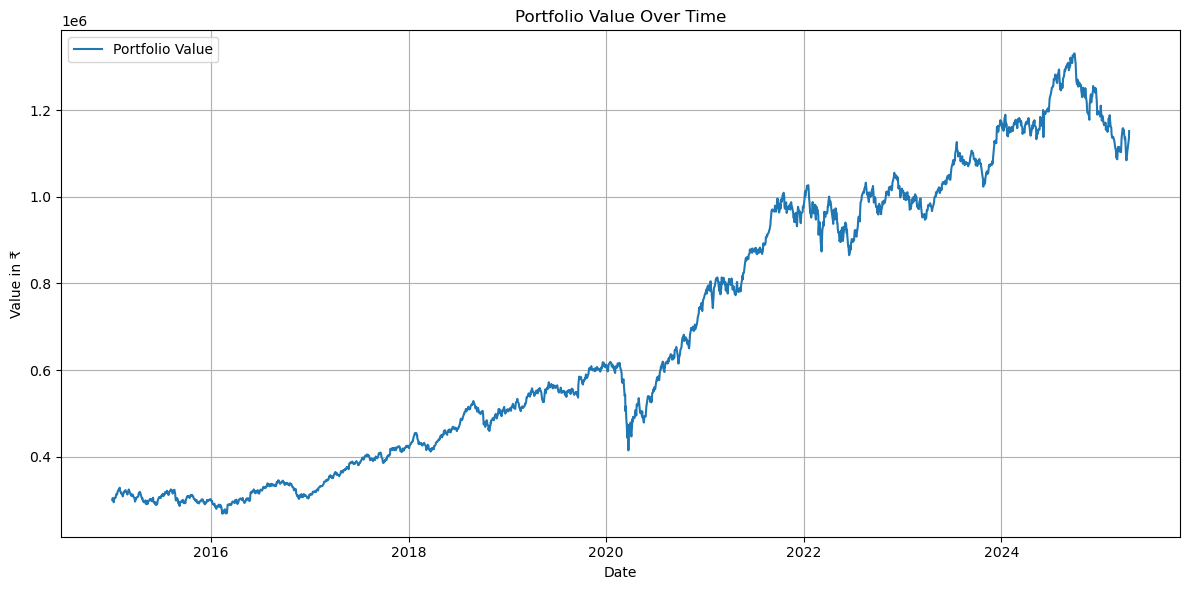

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values['Total Value'], label="Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Value in ₹")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# *CURRENT VALUE OF THE PORTFOLIO*

In [50]:
latest_prices = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    latest = stock.history(period='1d')['Close'].iloc[0]
    latest_prices[ticker] = latest

current_value = sum(shares[ticker] * latest_prices[ticker] for ticker in tickers)
print(f"\n📊 Current Value of Portfolio: ₹{current_value:,.2f}")



📊 Current Value of Portfolio: ₹1,160,170.72
